In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay

In [2]:
BATCH_SIZE = 60
IMG_SIZE = (224, 224)
train_dataset = tf.keras.utils.image_dataset_from_directory("D:/project/classifier_intersections/simulated_intersections",
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)
                                                            
validation_dataset_D = tf.keras.utils.image_dataset_from_directory("D:/project/classifier_intersections/test_sets/D",
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)

cross_dataset_D = tf.keras.utils.image_dataset_from_directory("D:/project/classifier_intersections/cross_validation_sets/ABC",
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)

validation_dataset_C = tf.keras.utils.image_dataset_from_directory("D:/project/classifier_intersections/test_sets/C",
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)

cross_dataset_C = tf.keras.utils.image_dataset_from_directory("D:/project/classifier_intersections/cross_validation_sets/ABD",
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)                                                           

validation_dataset_B = tf.keras.utils.image_dataset_from_directory("D:/project/classifier_intersections/test_sets/B",
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)

cross_dataset_B = tf.keras.utils.image_dataset_from_directory("D:/project/classifier_intersections/cross_validation_sets/ACD",
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)

validation_dataset_A = tf.keras.utils.image_dataset_from_directory("D:/project/classifier_intersections/test_sets/A",
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)

cross_dataset_A = tf.keras.utils.image_dataset_from_directory("D:/project/classifier_intersections/cross_validation_sets/BCD",
                                                            batch_size=BATCH_SIZE,
                                                            image_size=IMG_SIZE,
                                                            shuffle=True)

Found 10000 files belonging to 4 classes.
Found 500 files belonging to 4 classes.
Found 1500 files belonging to 4 classes.
Found 500 files belonging to 4 classes.
Found 1500 files belonging to 4 classes.
Found 500 files belonging to 4 classes.
Found 1500 files belonging to 4 classes.
Found 500 files belonging to 4 classes.
Found 1500 files belonging to 4 classes.


In [3]:
validation_dataset_A.class_names == train_dataset.class_names
validation_dataset_B.class_names == train_dataset.class_names
validation_dataset_C.class_names == train_dataset.class_names
validation_dataset_D.class_names == train_dataset.class_names

True

In [4]:
class_names = train_dataset.class_names

# plt.figure(figsize=(10, 10))
# for images, labels in train_dataset.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [5]:
print('Number of train batches: %d' % tf.data.experimental.cardinality(train_dataset))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset_D))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset_C))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset_B))
print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset_A))

Number of train batches: 167
Number of validation batches: 9
Number of validation batches: 9
Number of validation batches: 9
Number of validation batches: 9


In [6]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomRotation(0.7),
])

In [7]:
preprocess_input = tf.keras.applications.nasnet.preprocess_input

In [8]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.NASNetMobile(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [11]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(60, 7, 7, 1056)


In [9]:
base_model.trainable = False

In [ ]:
# base_model.summary()

In [12]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(60, 1056)


In [13]:
prediction_layer = tf.keras.layers.Dense(4, activation="softmax")
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(60, 4)


In [14]:
inputs = tf.keras.Input(shape=IMG_SHAPE)
x = data_augmentation(inputs)
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = prediction_layer(x)
model_D = tf.keras.Model(inputs, outputs)
model_C = tf.keras.Model(inputs, outputs)
model_B = tf.keras.Model(inputs, outputs)
model_A = tf.keras.Model(inputs, outputs)

In [15]:
base_learning_rate = 0.0001
model_D.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'],)
model_C.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'],)
model_B.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'],)
model_A.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'],)

In [ ]:
# model_D.summary()

In [15]:
initial_epochs = 5
history_D = model_D.fit(train_dataset, epochs=initial_epochs)

Epoch 1/5
167/167 [==============================] - 334s 2s/step - loss: 1.4097 - accuracy: 0.3419
Epoch 2/5
167/167 [==============================] - 309s 2s/step - loss: 1.0602 - accuracy: 0.5541
Epoch 3/5
167/167 [==============================] - 316s 2s/step - loss: 0.8784 - accuracy: 0.6428
Epoch 4/5
167/167 [==============================] - 306s 2s/step - loss: 0.7669 - accuracy: 0.7064
Epoch 5/5
167/167 [==============================] - 305s 2s/step - loss: 0.6791 - accuracy: 0.7471


In [15]:
initial_epochs = 5
history_C = model_C.fit(train_dataset, epochs=initial_epochs)

Epoch 1/5
167/167 [==============================] - 319s 2s/step - loss: 1.3856 - accuracy: 0.3525
Epoch 2/5
167/167 [==============================] - 309s 2s/step - loss: 1.0350 - accuracy: 0.5608
Epoch 3/5
167/167 [==============================] - 308s 2s/step - loss: 0.8676 - accuracy: 0.6456
Epoch 4/5
167/167 [==============================] - 308s 2s/step - loss: 0.7622 - accuracy: 0.7022
Epoch 5/5
167/167 [==============================] - 307s 2s/step - loss: 0.6831 - accuracy: 0.7382


In [16]:
initial_epochs = 5
history_B = model_B.fit(train_dataset, epochs=initial_epochs)

Epoch 1/5
167/167 [==============================] - 320s 2s/step - loss: 1.4436 - accuracy: 0.3297
Epoch 2/5
167/167 [==============================] - 302s 2s/step - loss: 1.0822 - accuracy: 0.5314
Epoch 3/5
167/167 [==============================] - 301s 2s/step - loss: 0.8861 - accuracy: 0.6359
Epoch 4/5
167/167 [==============================] - 299s 2s/step - loss: 0.7684 - accuracy: 0.6998
Epoch 5/5
167/167 [==============================] - 299s 2s/step - loss: 0.6868 - accuracy: 0.7391


In [16]:
initial_epochs = 5
history_A = model_A.fit(train_dataset, epochs=initial_epochs)

Epoch 1/5
167/167 [==============================] - 325s 2s/step - loss: 1.3686 - accuracy: 0.3712
Epoch 2/5
167/167 [==============================] - 304s 2s/step - loss: 1.0452 - accuracy: 0.5477
Epoch 3/5
167/167 [==============================] - 301s 2s/step - loss: 0.8614 - accuracy: 0.6525
Epoch 4/5
167/167 [==============================] - 300s 2s/step - loss: 0.7467 - accuracy: 0.7144
Epoch 5/5
167/167 [==============================] - 300s 2s/step - loss: 0.6664 - accuracy: 0.7539


In [ ]:
val_images_D =[]
true_labels_D = []
for image, label in validation_dataset_D.unbatch():
    val_images_D.append(image)
    true_labels_D.append(label)
val_images_D = np.array(val_images_D)
true_labels_D = np.array(true_labels_D)    

In [ ]:
val_images_C =[]
true_labels_C = []
for image, label in validation_dataset_C.unbatch():
    val_images_C.append(image)
    true_labels_C.append(label)
val_images_C = np.array(val_images_C)
true_labels_C = np.array(true_labels_C) 

In [ ]:
val_images_B =[]
true_labels_B = []
for image, label in validation_dataset_B.unbatch():
    val_images_B.append(image)
    true_labels_B.append(label)
val_images_B = np.array(val_images_B)
true_labels_B = np.array(true_labels_B) 

In [ ]:
val_images_A =[]
true_labels_A = []
for image, label in validation_dataset_A.unbatch():
    val_images_A.append(image)
    true_labels_A.append(label)
val_images_A = np.array(val_images_A)
true_labels_A = np.array(true_labels_A) 

In [ ]:
predictions_D = model_D.predict(val_images_D)
predict_labels_D = predictions_D.argmax(axis=1)

In [ ]:
predictions_C = model_C.predict(val_images_C)
predict_labels_C = predictions_C.argmax(axis=1)

In [ ]:
predictions_B = model_B.predict(val_images_B)
predict_labels_B = predictions_B.argmax(axis=1)

In [ ]:
predictions_A = model_A.predict(val_images_A)
predict_labels_A = predictions_A.argmax(axis=1)

In [ ]:
# intersections = validation_dataset_D.class_names
# cm = confusion_matrix(true_labels_D, predict_labels_D)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=intersections)
# fig, ax = plt.subplots(figsize=(10,10))
# disp.plot(cmap=plt.cm.Blues, ax=ax)
# plt.show()

In [ ]:
loss, acc = model_D.evaluate(val_images_D, true_labels_D)
print("Accuracy model D: {:5.2f}%".format(100 * acc))

In [ ]:
loss, acc = model_C.evaluate(val_images_C, true_labels_C)
print("Accuracy mode C: {:5.2f}%".format(100 * acc))

In [ ]:
loss, acc = model_B.evaluate(val_images_B, true_labels_B)
print("Accuracy model B: {:5.2f}%".format(100 * acc))

In [ ]:
loss, acc = model_A.evaluate(val_images_A, true_labels_A)
print("Accuracy model A: {:5.2f}%".format(100 * acc))

In [ ]:
# # save model
# model_D.save('D:/project/models/nasnet/D')
# model_C.save('D:/project/models/nasnet/C')
model_B.save('D:/project/models/nasnet/B')
# model_A.save('D:/project/models/nasnet/A')

In [ ]:
# # load modelodel
# model_D = tf.keras.models.load_model('D:/project/models/nasnet/D')
# model_C = tf.keras.models.load_model('D:/project/models/nasnet/C')
model_B = tf.keras.models.load_model('D:/project/models/nasnet/B')
# model_A = tf.keras.models.load_model('D:/project/models/nasnet/A')

In [17]:
base_model.trainable = True

In [ ]:
print("Number of layers in the base model: ", len(base_model.layers))

In [18]:
fine_tune_at = 170
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [19]:
base_learning_rate = 0.0001
model_D.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

model_C.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
model_B.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])
model_A.compile(optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

In [ ]:
# model_D.summary()

In [19]:
fine_tune_epochs = 9
total_epochs =  initial_epochs + fine_tune_epochs

history_fine_D = model_D.fit(cross_dataset_D,
                         epochs=total_epochs,
                         initial_epoch=history_D.epoch[-1],
                         validation_data=validation_dataset_D)

Epoch 5/14
25/25 [==============================] - 172s 6s/step - loss: 1.0305 - accuracy: 0.5660 - val_loss: 0.6966 - val_accuracy: 0.7860
Epoch 6/14
25/25 [==============================] - 136s 5s/step - loss: 0.6936 - accuracy: 0.7320 - val_loss: 0.4946 - val_accuracy: 0.8460
Epoch 7/14
25/25 [==============================] - 135s 5s/step - loss: 0.5443 - accuracy: 0.8133 - val_loss: 0.3935 - val_accuracy: 0.8860
Epoch 8/14
25/25 [==============================] - 135s 5s/step - loss: 0.4104 - accuracy: 0.8533 - val_loss: 0.3254 - val_accuracy: 0.8980
Epoch 9/14
25/25 [==============================] - 135s 5s/step - loss: 0.3337 - accuracy: 0.8807 - val_loss: 0.2951 - val_accuracy: 0.9000
Epoch 10/14
25/25 [==============================] - 132s 5s/step - loss: 0.2583 - accuracy: 0.9120 - val_loss: 0.2324 - val_accuracy: 0.9120
Epoch 11/14
25/25 [==============================] - 132s 5s/step - loss: 0.2053 - accuracy: 0.9320 - val_loss: 0.2543 - val_accuracy: 0.9020
Epoch 12/14

In [20]:
val_images_D =[]
true_labels_D = []
for image, label in validation_dataset_D.unbatch():
    val_images_D.append(image)
    true_labels_D.append(label)
val_images_D = np.array(val_images_D)
true_labels_D = np.array(true_labels_D)    

In [21]:
predictions_D = model_D.predict(val_images_D)
predict_labels_D = predictions_D.argmax(axis=1)

16/16 [==============================] - 19s 961ms/step


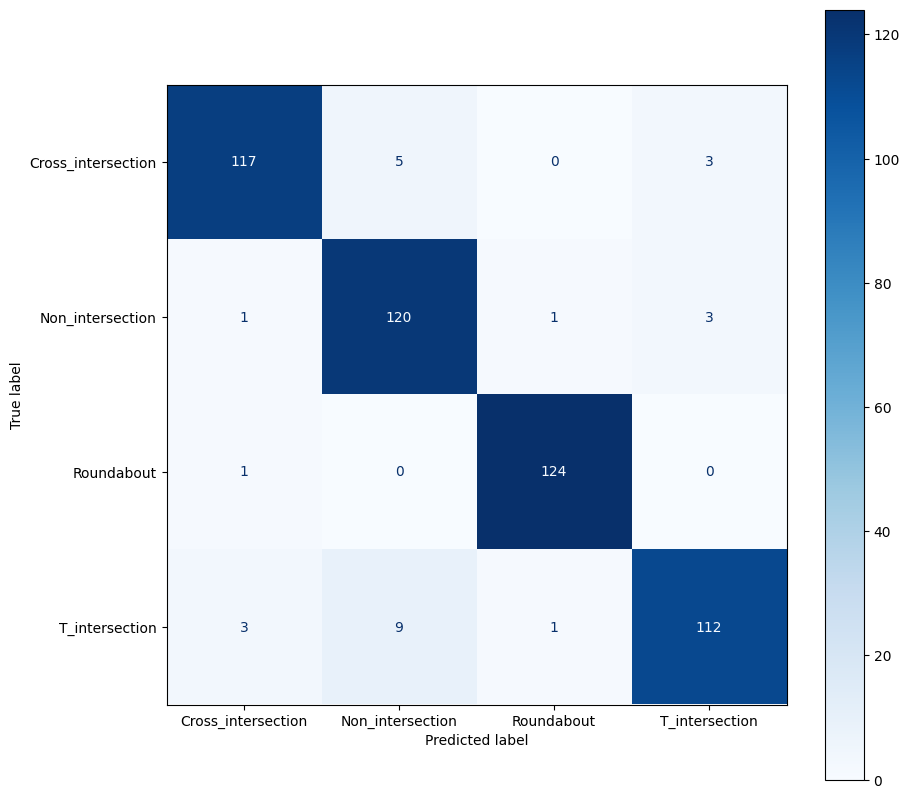

In [22]:
intersections = validation_dataset_D.class_names
cm = confusion_matrix(true_labels_D, predict_labels_D)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=intersections)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
#plt.savefig('train_Mb_V3/confusion.jpg')
plt.show()

In [23]:
loss, acc = model_D.evaluate(val_images_D, true_labels_D, verbose=2)
print("Accuracy model D: {:5.2f}%".format(100 * acc))

16/16 - 15s - loss: 0.1554 - accuracy: 0.9460 - 15s/epoch - 961ms/step
Accuracy model D: 94.60%


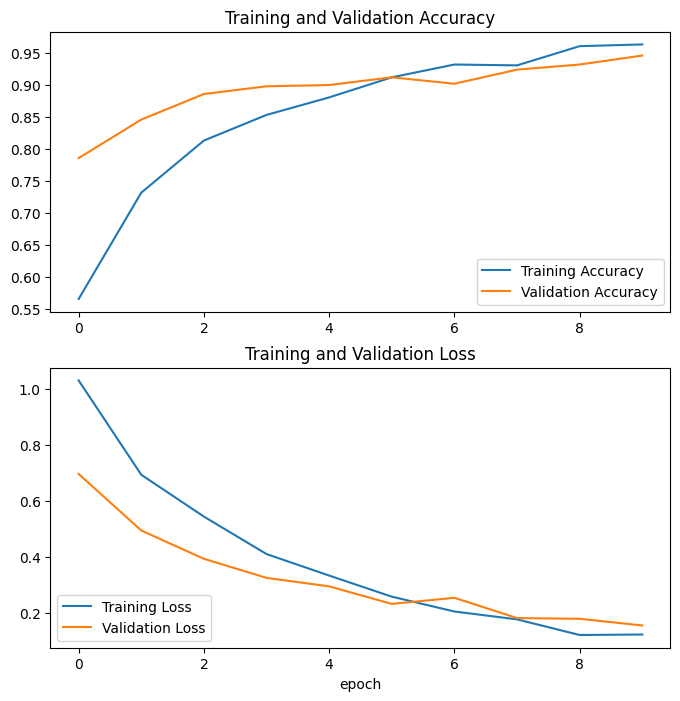

In [24]:
acc = history_fine_D.history['accuracy']
val_acc = history_fine_D.history['val_accuracy']

loss = history_fine_D.history['loss']
val_loss = history_fine_D.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
#plt.savefig('train_Mb_V3/acc_loss.jpg')
plt.show()

In [25]:
model_D.save('D:/project/models/nasnetmodel/D')

INFO:tensorflow:Assets written to: D:/project/models/nasnetmodel/D\assets


INFO:tensorflow:Assets written to: D:/project/models/nasnetmodel/D\assets


In [19]:
fine_tune_epochs = 9
total_epochs =  initial_epochs + fine_tune_epochs

history_fine_C = model_C.fit(cross_dataset_C,
                         epochs=total_epochs,
                         initial_epoch=history_C.epoch[-1],
                         validation_data=validation_dataset_C)

Epoch 5/14
25/25 [==============================] - 171s 6s/step - loss: 0.9474 - accuracy: 0.5973 - val_loss: 0.6708 - val_accuracy: 0.7680
Epoch 6/14
25/25 [==============================] - 134s 5s/step - loss: 0.6698 - accuracy: 0.7460 - val_loss: 0.5084 - val_accuracy: 0.8400
Epoch 7/14
25/25 [==============================] - 134s 5s/step - loss: 0.4928 - accuracy: 0.8167 - val_loss: 0.3963 - val_accuracy: 0.8680
Epoch 8/14
25/25 [==============================] - 132s 5s/step - loss: 0.4117 - accuracy: 0.8533 - val_loss: 0.3277 - val_accuracy: 0.8960
Epoch 9/14
25/25 [==============================] - 133s 5s/step - loss: 0.3356 - accuracy: 0.8747 - val_loss: 0.2966 - val_accuracy: 0.9020
Epoch 10/14
25/25 [==============================] - 133s 5s/step - loss: 0.2609 - accuracy: 0.9067 - val_loss: 0.2797 - val_accuracy: 0.8920
Epoch 11/14
25/25 [==============================] - 132s 5s/step - loss: 0.1993 - accuracy: 0.9413 - val_loss: 0.2882 - val_accuracy: 0.8960
Epoch 12/14

In [20]:
val_images_C =[]
true_labels_C = []
for image, label in validation_dataset_C.unbatch():
    val_images_C.append(image)
    true_labels_C.append(label)
val_images_C = np.array(val_images_C)
true_labels_C = np.array(true_labels_C) 

In [21]:
predictions_C = model_C.predict(val_images_C)
predict_labels_C = predictions_C.argmax(axis=1)

16/16 [==============================] - 17s 853ms/step


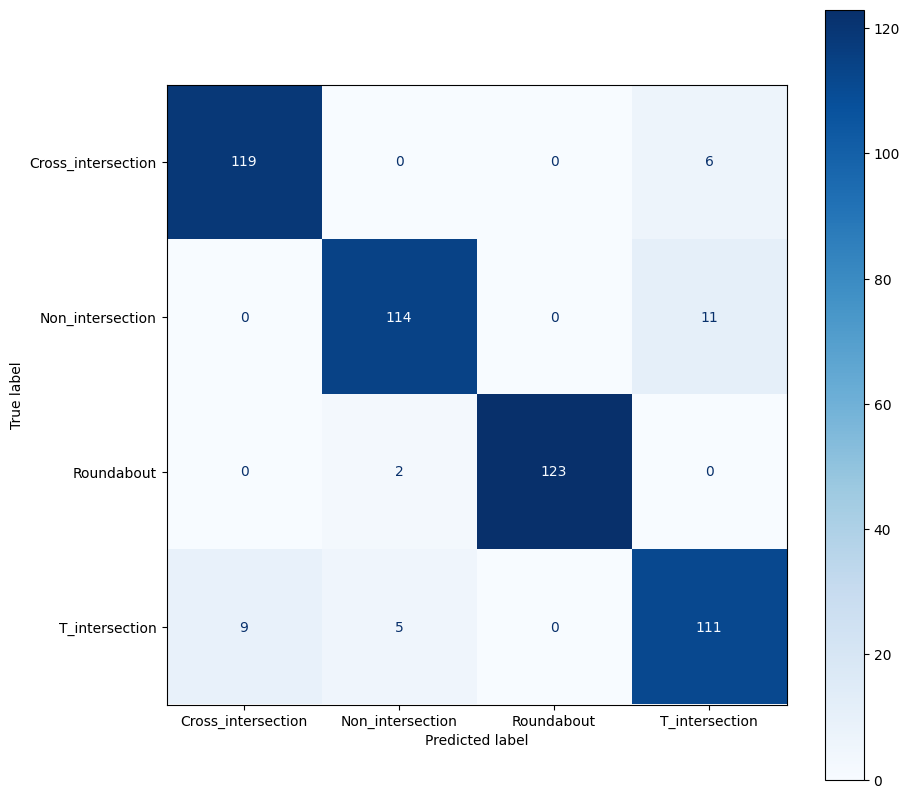

In [22]:
intersections = validation_dataset_C.class_names
cm = confusion_matrix(true_labels_C, predict_labels_C)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=intersections)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
#plt.savefig('train_Mb_V3/confusion.jpg')
plt.show()

In [23]:
loss, acc = model_C.evaluate(val_images_C, true_labels_C, verbose=2)
print("Accuracy model C: {:5.2f}%".format(100 * acc))

16/16 - 15s - loss: 0.1682 - accuracy: 0.9340 - 15s/epoch - 964ms/step
Accuracy model C: 93.40%


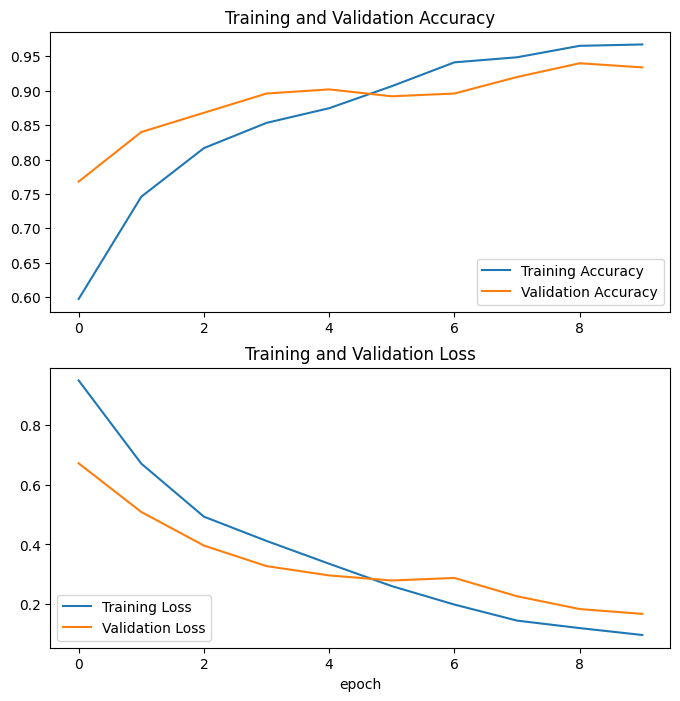

In [25]:
acc = history_fine_C.history['accuracy']
val_acc = history_fine_C.history['val_accuracy']

loss = history_fine_C.history['loss']
val_loss = history_fine_C.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
#plt.savefig('train_Mb_V3/acc_loss.jpg')
plt.show()

In [26]:
model_C.save('D:/project/models/nasnetmodel/C')

INFO:tensorflow:Assets written to: D:/project/models/nasnetmodel/C\assets


INFO:tensorflow:Assets written to: D:/project/models/nasnetmodel/C\assets


In [20]:
fine_tune_epochs = 9
# initial_epochs = 10
total_epochs =  initial_epochs + fine_tune_epochs

history_fine_B = model_B.fit(cross_dataset_B,
                         epochs=total_epochs,
                         initial_epoch=history_B.epoch[-1],
                         validation_data=validation_dataset_B)

Epoch 5/14
25/25 [==============================] - 181s 6s/step - loss: 0.8943 - accuracy: 0.6287 - val_loss: 0.7161 - val_accuracy: 0.7080
Epoch 6/14
25/25 [==============================] - 135s 5s/step - loss: 0.5814 - accuracy: 0.7833 - val_loss: 0.5838 - val_accuracy: 0.7860
Epoch 7/14
25/25 [==============================] - 133s 5s/step - loss: 0.4114 - accuracy: 0.8567 - val_loss: 0.5103 - val_accuracy: 0.8140
Epoch 8/14
25/25 [==============================] - 131s 5s/step - loss: 0.3172 - accuracy: 0.8987 - val_loss: 0.4736 - val_accuracy: 0.8200
Epoch 9/14
25/25 [==============================] - 132s 5s/step - loss: 0.2493 - accuracy: 0.9120 - val_loss: 0.4475 - val_accuracy: 0.8480
Epoch 10/14
25/25 [==============================] - 132s 5s/step - loss: 0.1956 - accuracy: 0.9300 - val_loss: 0.4221 - val_accuracy: 0.8740
Epoch 11/14
25/25 [==============================] - 132s 5s/step - loss: 0.1527 - accuracy: 0.9447 - val_loss: 0.4064 - val_accuracy: 0.8660
Epoch 12/14

In [21]:
val_images_B =[]
true_labels_B = []
for image, label in validation_dataset_B.unbatch():
    val_images_B.append(image)
    true_labels_B.append(label)
val_images_B = np.array(val_images_B)
true_labels_B = np.array(true_labels_B) 

In [22]:
predictions_B = model_B.predict(val_images_B)
predict_labels_B = predictions_B.argmax(axis=1)

16/16 [==============================] - 19s 937ms/step


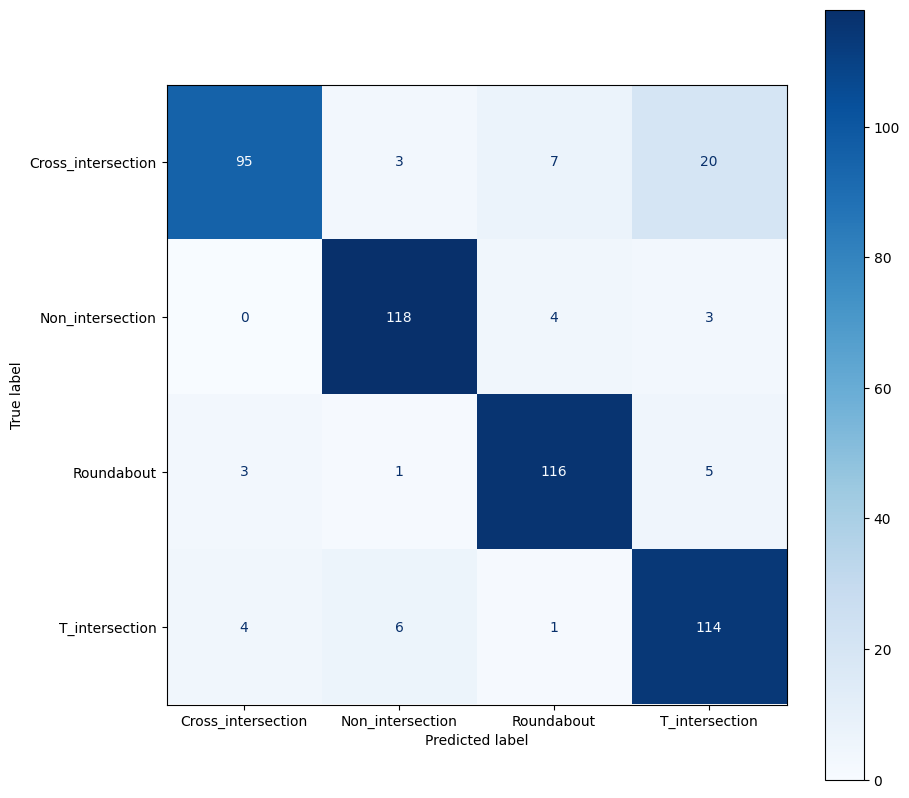

In [23]:
intersections = validation_dataset_B.class_names
cm = confusion_matrix(true_labels_B, predict_labels_B)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=intersections)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
#plt.savefig('train_Mb_V3/confusion.jpg')
plt.show()

In [24]:
loss, acc = model_B.evaluate(val_images_B, true_labels_B, verbose=2)
print("Accuracy model B: {:5.2f}%".format(100 * acc))

16/16 - 16s - loss: 0.4303 - accuracy: 0.8860 - 16s/epoch - 978ms/step
Accuracy model B: 88.60%


In [25]:
model_B.save('D:/project/models/nasnetmodel/B')

INFO:tensorflow:Assets written to: D:/project/models/nasnetmodel/B\assets


INFO:tensorflow:Assets written to: D:/project/models/nasnetmodel/B\assets


In [20]:
fine_tune_epochs = 9
total_epochs =  initial_epochs + fine_tune_epochs

history_fine_A = model_A.fit(cross_dataset_A,
                         epochs=total_epochs,
                         initial_epoch=history_A.epoch[-1],
                         validation_data=validation_dataset_A)

Epoch 5/14
25/25 [==============================] - 169s 6s/step - loss: 0.9125 - accuracy: 0.6340 - val_loss: 0.7323 - val_accuracy: 0.7180
Epoch 6/14
25/25 [==============================] - 133s 5s/step - loss: 0.6105 - accuracy: 0.7707 - val_loss: 0.6020 - val_accuracy: 0.7700
Epoch 7/14
25/25 [==============================] - 133s 5s/step - loss: 0.4555 - accuracy: 0.8567 - val_loss: 0.5178 - val_accuracy: 0.8120
Epoch 8/14
25/25 [==============================] - 134s 5s/step - loss: 0.3455 - accuracy: 0.8913 - val_loss: 0.4546 - val_accuracy: 0.8340
Epoch 9/14
25/25 [==============================] - 132s 5s/step - loss: 0.2740 - accuracy: 0.9113 - val_loss: 0.4257 - val_accuracy: 0.8420
Epoch 10/14
25/25 [==============================] - 133s 5s/step - loss: 0.2208 - accuracy: 0.9253 - val_loss: 0.3814 - val_accuracy: 0.8520
Epoch 11/14
25/25 [==============================] - 132s 5s/step - loss: 0.1660 - accuracy: 0.9513 - val_loss: 0.3727 - val_accuracy: 0.8720
Epoch 12/14

In [ ]:
val_images_A =[]
true_labels_A = []
for image, label in validation_dataset_A.unbatch():
    val_images_A.append(image)
    true_labels_A.append(label)
val_images_A = np.array(val_images_A)
true_labels_A = np.array(true_labels_A) 

In [ ]:
predictions_A = model_A.predict(val_images_A)
predict_labels_A = predictions_A.argmax(axis=1)

In [ ]:
intersections = validation_dataset_A.class_names
cm = confusion_matrix(true_labels_A, predict_labels_A)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=intersections)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(cmap=plt.cm.Blues, ax=ax)
#plt.savefig('train_Mb_V3/confusion.jpg')
plt.show()

In [ ]:
loss, acc = model_A.evaluate(val_images_A, true_labels_A, verbose=2)
print("Accuracy model A: {:5.2f}%".format(100 * acc))

In [ ]:
acc += history_fine_A.history['accuracy']
val_acc += history_fine_A.history['val_accuracy']

loss += history_fine_A.history['loss']
val_loss += history_fine_A.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='lower left')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
#plt.savefig('train_Mb_V3/acc_loss.jpg')
plt.show()

In [21]:
# # save model
model_A.save('D:/project/models/nasnetmodel/A')

INFO:tensorflow:Assets written to: D:/project/models/nasnetmodel/A\assets


INFO:tensorflow:Assets written to: D:/project/models/nasnetmodel/A\assets
